In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df =pd.read_csv("8-fraud_detection.csv")

In [5]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [7]:
df.shape

(10000, 3)

In [9]:
df.describe()

,transaction_amount,transaction_risk_score,is_fraud
count,10000.000000,10000.000000,10000.000000
mean,0.976419,-1.003136,0.015400
std,0.725346,0.789194,0.123144
min,-3.370100,-3.952121,0.000000
25%,0.505517,-1.538232,0.000000
50%,0.990240,-0.997064,0.000000
75%,1.461125,-0.466221,0.000000
max,3.487193,1.872543,1.000000


In [11]:
df["is_fraud"].unique()

array([0, 1])

In [13]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

In [15]:
#imblanced dataset

In [17]:
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

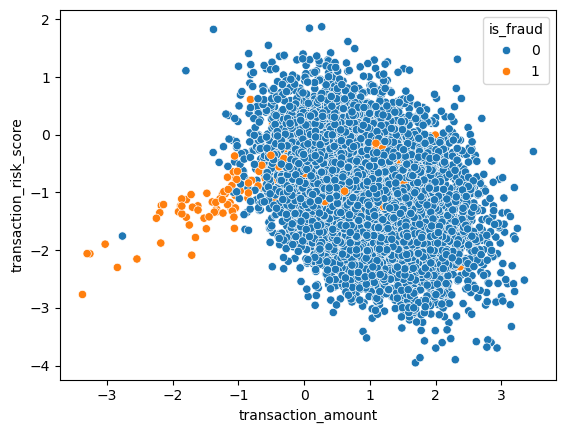

In [21]:
sns.scatterplot(x=X["transaction_amount"], y=X["transaction_risk_score"],hue=y)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [30]:
model = LogisticRegression()

In [34]:
#hyperparameter tuning with class weights to handle imbalance
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [36]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [40]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [42]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [44]:
cv = StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [46]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [50]:
y_pred = grid.predict(X_test)

In [52]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [54]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [56]:
score=accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n " , confusion_matrix(y_pred,y_test))

score:  0.9893333333333333
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2977
           1       0.41      0.87      0.56        23

    accuracy                           0.99      3000
   macro avg       0.70      0.93      0.78      3000
weighted avg       0.99      0.99      0.99      3000

confusion matrix: 
  [[2948   29]
 [   3   20]]


In [60]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [62]:
#roc -auc